#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dataset

In [2]:
dataset = pd.read_csv('weatherAUS.csv')


In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#Describe Method says the statistics of our data like Maxvalue,Mean,Count..etc for every column
 
dataset.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
#count all the null values in the data
dataset.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
#it is clear that evaporation and sunshine have more missing values so better remove them 

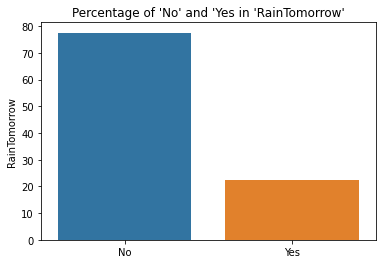

In [7]:
#Counting the Count of 'NO' and 'YES' from the column RainTomorrow 
RT = dataset["RainTomorrow"].value_counts(normalize = True)

sns.barplot(x = RT.index, y = RT*100).set_title("Percentage of 'No' and 'Yes in 'RainTomorrow'");

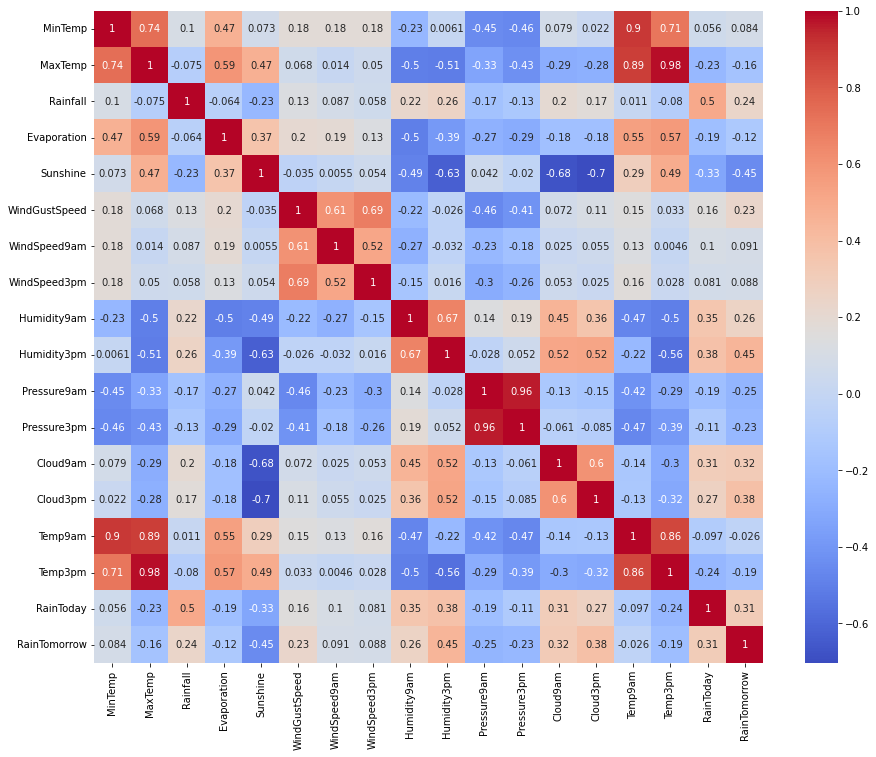

In [8]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

dataset['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
dataset['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(dataset.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

## **cleaning and preprocessing**

handling class imbalance


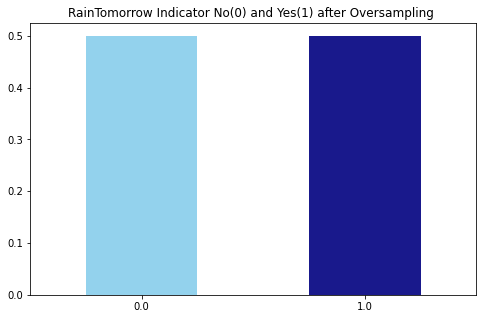

In [9]:
from sklearn.utils import resample

no = dataset[dataset.RainTomorrow == 0]
yes = dataset[dataset.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
dataset = pd.concat([no, yes_oversampled])


fig = plt.figure(figsize = (8,5))
dataset.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()

## Feature Selection

**bold text**

In [10]:
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [11]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['Cairns' 24.8 31.5 ... 28.7 30.3 0.0]
 ['Ballarat' 4.2 7.9 ... 4.6 6.8 1.0]
 ['Richmond' 19.5 31.6 ... 22.5 31.1 0.0]]


In [12]:
print(Y)

[0. 0. 0. ... 1. 1. 1.]


In [13]:
Y = Y.reshape(-1,1)

#Dealing with invalid Data

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [15]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['Cairns' 24.8 31.5 ... 28.7 30.3 0.0]
 ['Ballarat' 4.2 7.9 ... 4.6 6.8 1.0]
 ['Richmond' 19.5 31.6 ... 22.5 31.1 0.0]]


In [16]:
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


#Encoding Dataset

In [17]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [18]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [8 24.8 31.5 ... 28.7 30.3 0]
 [5 4.2 7.9 ... 4.6 6.8 1]
 [34 19.5 31.6 ... 22.5 31.1 0]]


In [19]:
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [20]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


#Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
print(X)

[[-1.5296304   0.13989127  0.06345497 ...  0.00998997  0.15393456
  -0.66291173]
 [-1.5296304  -0.80100322  0.37304035 ...  0.05663083  0.51760514
  -0.66291173]
 [-1.5296304   0.0614834   0.45747273 ...  0.64741511  0.35759009
  -0.66291173]
 ...
 [-1.10665539  1.9275908   1.27365237 ...  1.8445306   1.39041454
  -0.66291173]
 [-1.31814289 -1.30281361 -2.04735446 ... -1.90228544 -2.02808893
   1.50849646]
 [ 0.72623631  1.09646733  1.28772444 ...  0.88061942  1.50678913
  -0.66291173]]


In [23]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

## MODELLING

#Splitting Dataset into Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
print(X_train)

[[ 0.02127796  1.34737253  1.37215681 ...  1.11382374  0.11029409
  -0.66291173]
 [ 1.50169049 -0.33055597 -0.58385992 ... -0.79845166 -0.74796848
   1.50849646]
 [ 0.37375714  0.72010954  1.97725552 ...  1.19155851  2.10320888
  -0.66291173]
 ...
 [ 0.65574047  0.2496623   0.3167521  ...  1.08272983  0.00846633
  -0.66291173]
 [-1.31814289 -0.58146117 -0.6682923  ... -0.67407603 -0.60250025
  -0.66291173]
 [ 0.02127796  0.17125442 -0.5557158  ... -0.05219785 -0.39884472
   1.50849646]]


In [26]:
print(Y_train)

[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [27]:
Y_test.shape


(44127, 1)

## MODELS

#Training Model

# **Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_rf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [29]:
classifier_rf.score(X_train,Y_train)

0.9998413642673012

In [30]:
y_pred_rf = le6.inverse_transform(np.array(classifier_rf.predict(X_test),dtype=int))
Y_test_rf = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
print(y_pred_rf)

[1. 1. 0. ... 0. 1. 0.]


In [32]:
print(Y_test_rf)

[0. 1. 0. ... 0. 1. 0.]


In [33]:
y_pred_rf = y_pred_rf.reshape(-1,1)
Y_test_rf = Y_test_rf.reshape(-1,1)

In [34]:
df = np.concatenate((Y_test_rf,y_pred_rf),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [35]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                1.0
1                    1.0                1.0
2                    0.0                0.0
3                    0.0                1.0
4                    1.0                1.0
...                  ...                ...
44122                0.0                0.0
44123                1.0                1.0
44124                0.0                0.0
44125                1.0                1.0
44126                0.0                0.0

[44127 rows x 2 columns]


Calculating Accuracy of random forest

In [36]:
from sklearn.metrics import accuracy_score
acc_rfs=accuracy_score(Y_test_rf,y_pred_rf)
acc_rfs

0.9471751988578422

In [37]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_rf,y_pred_rf)
print(cm)


[[20233  1770]
 [  561 21563]]


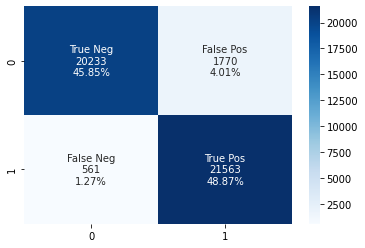

In [38]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues');

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_rf,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95     22003
         1.0       0.92      0.97      0.95     22124

    accuracy                           0.95     44127
   macro avg       0.95      0.95      0.95     44127
weighted avg       0.95      0.95      0.95     44127



# **Logisitic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression  
classifier_lr = LogisticRegression(random_state=0)  
classifier_lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [41]:
classifier_lr.score(X_train,Y_train)

0.7752528256989887

In [42]:
y_pred_lr = le6.inverse_transform(np.array(classifier_lr.predict(X_test),dtype=int))
Y_test_lr = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print(y_pred_lr)

[1. 1. 1. ... 0. 1. 1.]


In [44]:
print(Y_test_lr)

[0. 1. 0. ... 0. 1. 0.]


In [45]:
y_pred_lr = y_pred_lr.reshape(-1,1)
Y_test_lr = Y_test_lr.reshape(-1,1)

In [46]:
df = np.concatenate((Y_test_lr,y_pred_lr),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [47]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                1.0
1                    1.0                1.0
2                    0.0                1.0
3                    0.0                1.0
4                    1.0                1.0
...                  ...                ...
44122                0.0                0.0
44123                1.0                1.0
44124                0.0                0.0
44125                1.0                1.0
44126                0.0                1.0

[44127 rows x 2 columns]


In [48]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(Y_test_lr,y_pred_lr)
acc_lr

0.7745824551861672

In [49]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_lr=confusion_matrix(Y_test_lr,y_pred_lr)
print(cm_lr)


[[17398  4605]
 [ 5342 16782]]


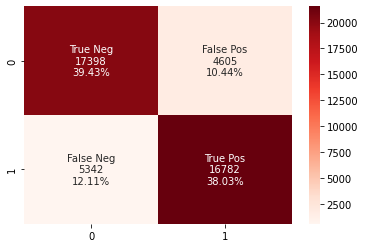

In [50]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Reds');

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     22003
         1.0       0.78      0.76      0.77     22124

    accuracy                           0.77     44127
   macro avg       0.77      0.77      0.77     44127
weighted avg       0.77      0.77      0.77     44127



# **DecisionTree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
classifier_dt.score(X_train,Y_train)

0.9998413642673012

In [54]:
y_pred_dt = le6.inverse_transform(np.array(classifier_dt.predict(X_test),dtype=int))
Y_test_dt = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
print(y_pred_dt)

[0. 1. 0. ... 0. 1. 0.]


In [56]:
print(Y_test_dt)

[0. 1. 0. ... 0. 1. 0.]


In [57]:
y_pred_dt = y_pred_dt.reshape(-1,1)
Y_test_dt = Y_test_dt.reshape(-1,1)

In [58]:
df = np.concatenate((Y_test_dt,y_pred_dt),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [59]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    1.0                1.0
2                    0.0                0.0
3                    0.0                1.0
4                    1.0                1.0
...                  ...                ...
44122                0.0                0.0
44123                1.0                1.0
44124                0.0                0.0
44125                1.0                1.0
44126                0.0                0.0

[44127 rows x 2 columns]


In [60]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(Y_test_dt,y_pred_dt)
acc_dt

0.909307226867904

In [61]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_dt=confusion_matrix(Y_test_dt,y_pred_dt)
print(cm_dt)

[[18645  3358]
 [  644 21480]]


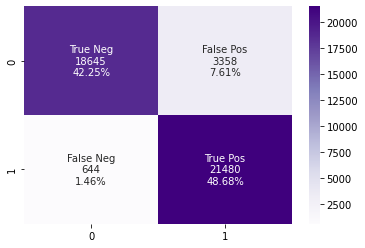

In [62]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Purples');

In [63]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_dt,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90     22003
         1.0       0.86      0.97      0.91     22124

    accuracy                           0.91     44127
   macro avg       0.92      0.91      0.91     44127
weighted avg       0.92      0.91      0.91     44127



# **Light Gbm**

In [64]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(random_state = 0)
classifier_lgbm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(random_state=0)

In [66]:
classifier_lgbm.score(X_train,Y_train)

0.81376164981162

In [67]:
y_pred_lgbm = le6.inverse_transform(np.array(classifier_lgbm.predict(X_test),dtype=int))
Y_test_lgbm = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
print(y_pred_lgbm)

[1. 1. 1. ... 0. 1. 0.]


In [69]:
print(Y_test_lgbm)

[0. 1. 0. ... 0. 1. 0.]


In [70]:
y_pred_lgbm = y_pred_lgbm.reshape(-1,1)
Y_test_lgbm = Y_test_lgbm.reshape(-1,1)

In [71]:
df = np.concatenate((Y_test_lgbm,y_pred_lgbm),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [72]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                1.0
1                    1.0                1.0
2                    0.0                1.0
3                    0.0                1.0
4                    1.0                1.0
...                  ...                ...
44122                0.0                0.0
44123                1.0                1.0
44124                0.0                0.0
44125                1.0                1.0
44126                0.0                0.0

[44127 rows x 2 columns]


In [73]:
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(Y_test_lgbm,y_pred_lgbm)
acc_lg

0.8076007886328098

In [74]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_lg=confusion_matrix(Y_test_lgbm,y_pred_lgbm)
print(cm_lg)

[[18000  4003]
 [ 4487 17637]]


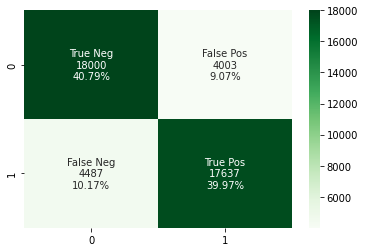

In [75]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lg.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lg, annot=labels, fmt="", cmap='Greens');

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lgbm,y_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81     22003
         1.0       0.82      0.80      0.81     22124

    accuracy                           0.81     44127
   macro avg       0.81      0.81      0.81     44127
weighted avg       0.81      0.81      0.81     44127



# **Naive Bayes**

In [77]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [78]:
classifier_nb.score(X_train,Y_train)

0.742585195886802

In [79]:
y_pred_nb = le6.inverse_transform(np.array(classifier_nb.predict(X_test),dtype=int))
Y_test_nb = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
print(y_pred_nb)

[1. 1. 1. ... 0. 1. 1.]


In [81]:
print(Y_test_nb)

[0. 1. 0. ... 0. 1. 0.]


In [82]:
y_pred_nb = y_pred_nb.reshape(-1,1)
Y_test_nb = Y_test_nb.reshape(-1,1)

In [83]:
df = np.concatenate((Y_test_nb,y_pred_nb),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [84]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                1.0
1                    1.0                1.0
2                    0.0                1.0
3                    0.0                1.0
4                    1.0                1.0
...                  ...                ...
44122                0.0                0.0
44123                1.0                0.0
44124                0.0                0.0
44125                1.0                1.0
44126                0.0                1.0

[44127 rows x 2 columns]


In [85]:
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(Y_test_nb,y_pred_nb)
acc_nb

0.7405896616583951

In [86]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_nb=confusion_matrix(Y_test_nb,y_pred_nb)
print(cm_nb)

[[17603  4400]
 [ 7047 15077]]


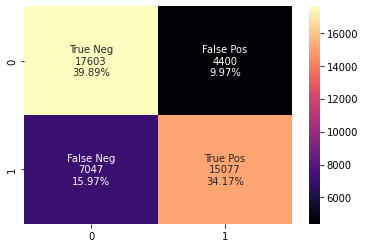

In [87]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_nb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_nb.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_nb, annot=labels, fmt="", cmap='magma');

In [88]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_nb,y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75     22003
         1.0       0.77      0.68      0.72     22124

    accuracy                           0.74     44127
   macro avg       0.74      0.74      0.74     44127
weighted avg       0.74      0.74      0.74     44127



## Accuracy Comparison

In [89]:
accuracy_dict = {"Logistic Regression": acc_lr,
                 "Random Forest": acc_rfs,
                 "Decision Trees": acc_dt,
                 "LightGBM": acc_lg,
                 "Naive Bayes": acc_nb}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.774582
Random Forest,0.947175
Decision Trees,0.909307
LightGBM,0.807601
Naive Bayes,0.740590


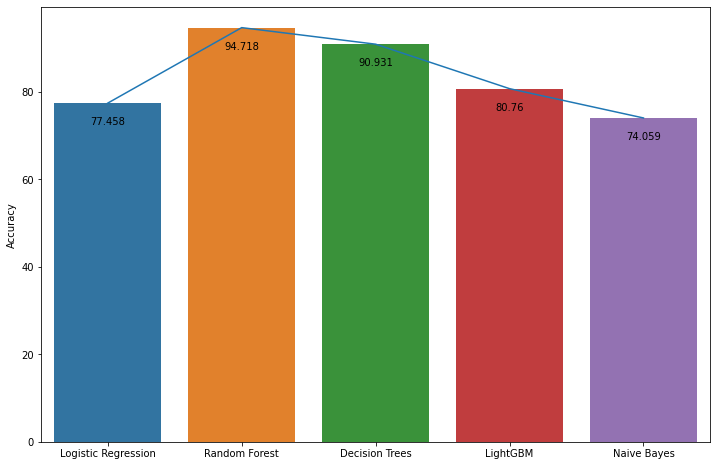

In [90]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")